# Data Analysis on House Price Predictions

The goal is to
1. Analyze the relationships between different features
2. Analyze the relationships between features and the target variable
3. Find the missing values of the dataset
4. Find the different numerical and categorical features 
5. Find the distributions of the numerical variables
6. Find cardinality of categorical variables
7. Find outliers in the dataset
8. Find the relationship between features and target variable (housing price)

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [40]:
df = pd.read_csv('train.csv', index_col='Id')
target = df['SalePrice']
df = df.drop('SalePrice', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [41]:
print(df.shape)

(1460, 79)


Find the missing values in the dataset, and in which columns they are in

In [42]:
features_na = [feature for feature in df.columns if df[feature].isnull().any()]
for feature in features_na:
    print(f'{feature} has {round(df[feature].isnull().mean() * 100, 2)}% missing values')

LotFrontage has 17.74% missing values
Alley has 93.77% missing values
MasVnrType has 0.55% missing values
MasVnrArea has 0.55% missing values
BsmtQual has 2.53% missing values
BsmtCond has 2.53% missing values
BsmtExposure has 2.6% missing values
BsmtFinType1 has 2.53% missing values
BsmtFinType2 has 2.6% missing values
Electrical has 0.07% missing values
FireplaceQu has 47.26% missing values
GarageType has 5.55% missing values
GarageYrBlt has 5.55% missing values
GarageFinish has 5.55% missing values
GarageQual has 5.55% missing values
GarageCond has 5.55% missing values
PoolQC has 99.52% missing values
Fence has 80.75% missing values
MiscFeature has 96.3% missing values


We can clearly see that "Alley", "FireplaceQu", "PoolQC", "Fence", and "MiscFeature" have **a lot** of missing values. Thus, it would be a good idea to simply drop those columns from the dataset

In [43]:
to_drop = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
df = df.drop(to_drop, axis=1)
df.shape

(1460, 74)

Let's take a closer look at the "LotFrontage" column; the proportion of missing value is not very big, but still significant enough so that we should dive deeper into it. 

In [44]:
df.LotFrontage.head()

Id
1    65.0
2    80.0
3    68.0
4    60.0
5    84.0
Name: LotFrontage, dtype: float64

We can see that this is a numerical feature, so the first thing we can do is to plot a scatterplot and visualize its relationship with respect to the target variable. 

Text(0, 0.5, 'Sale Price')

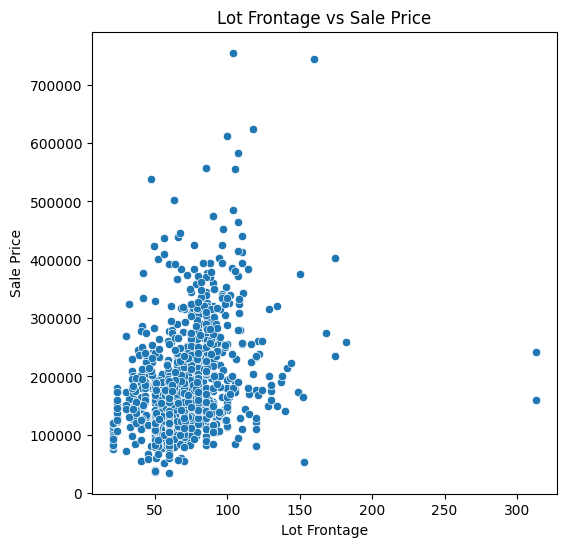

In [48]:
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x = 'LotFrontage', y = target)
plt.title('Lot Frontage vs Sale Price')
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')


We can see that there is definitely a positive correlation between Lot Frontage and Sale Price, with a few outliers. Thus, we will not remove this column, but rather we will fill in the missing values in a meaningful way. This will be done later in the data engineering section. 

# Numerical Features
Here, we will find out the numerical features of the dataset

In [51]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'There are {len(num_features)} numerical features.')

# take a look at the first few entries
df[num_features].head()

There are 36 numerical features.


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


We notice from the columns that there are 4 columns with "year": "YearBuilt", "YearRemodAdd", "GarageYrBlt", and "YrSold". Let's save these columns, and take a deeper look at it.

In [52]:
year_cols = [feature for feature in num_features if 'Year' in feature or 'Yr' in feature]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Let's take a look at how many unique values each of the year feature has, as well as the min and max year.

In [54]:
for year in year_cols:
    minimum = df[year].min()
    maximum = df[year].max()
    count = len(df[year].unique())
    print(f'{year}: min ({minimum}), max ({maximum}) and has {count} values')

YearBuilt: min (1872), max (2010) and has 112 values
YearRemodAdd: min (1950), max (2010) and has 61 values
GarageYrBlt: min (1900.0), max (2010.0) and has 98 values
YrSold: min (2006), max (2010) and has 5 values


Let's take a look at the mean and median price of the house as a function of the built year. 

Text(0.5, 1.0, 'Year Built vs Price wrt median')

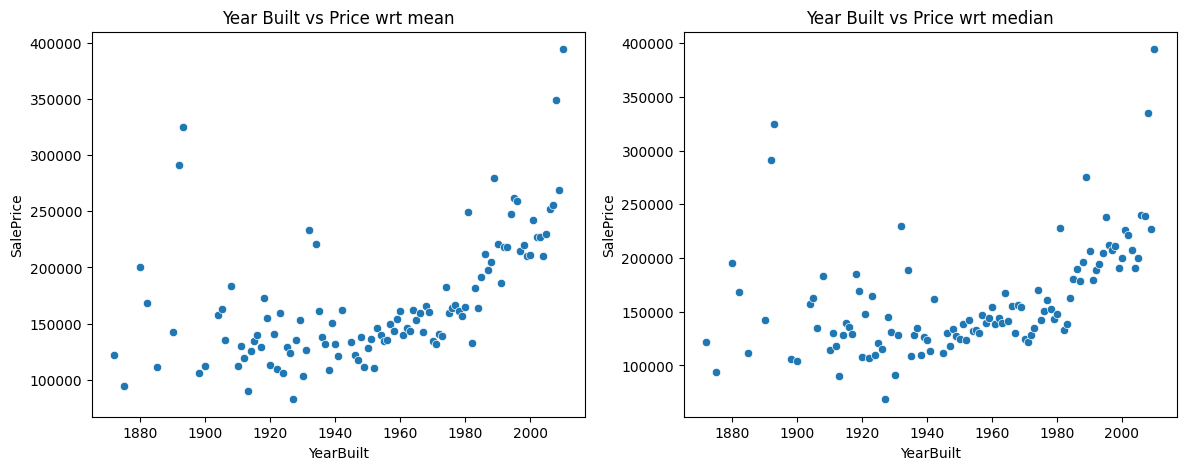

In [63]:
full_data = pd.concat([df, target], axis=1)
# full_data.head()
year_built_data_mean = full_data.groupby('YearBuilt')['SalePrice'].mean()
year_built_data_median = full_data.groupby('YearBuilt')['SalePrice'].median()

plt.figure(figsize=(14, 5))

plt.subplot(121)
sns.scatterplot(year_built_data_mean)
plt.title('Year Built vs Price wrt mean')

plt.subplot(122)
sns.scatterplot(year_built_data_median)
plt.title('Year Built vs Price wrt median')

We can see that the graphs are similar whether we check the price with respect to the mean or the median, which is to be expected. More importantly, we can see that as the build year increases, the house price also increases. The relationship doesn't seem linear however, it appears to be parabolic. 

We can also take a look at how the sale price changes as a function of the time interval between the house's built year and its sale year

Text(0.5, 1.0, 'House price as a function of build and sale year difference')

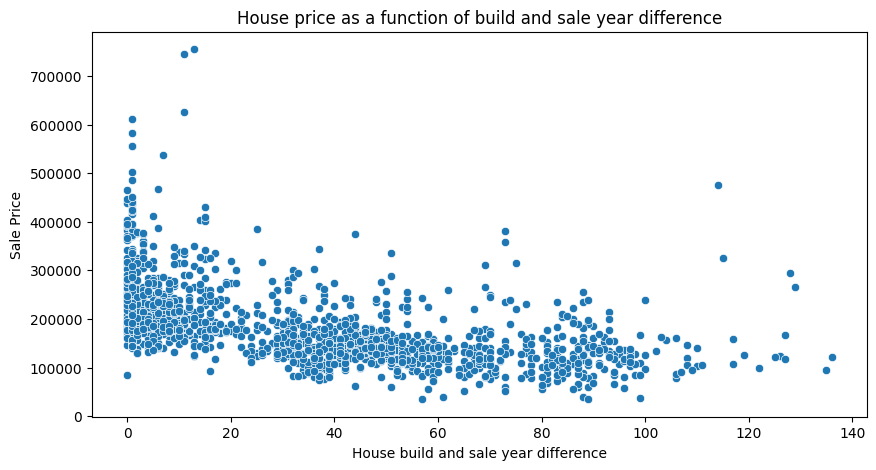

In [71]:
year_diff = pd.Series(df.YrSold - df.YearBuilt, name='YearDiff', index=df.YrSold.index)
year_data = pd.concat([year_diff, target], axis=1)
year_data.head()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=year_data, x = 'YearDiff', y = 'SalePrice')
plt.xlabel('House build and sale year difference')
plt.ylabel('Sale Price')
plt.title(
    'House price as a function of build and sale year difference'
)

Here, we notice that the smaller the difference between the house build year and the sale year, the higher the price is. This makes sense, as people do not want to pay a lot for houses that have been built a long time ago.

## Discrete Numerical Features

To sub divide numerical features, we can see which ones are discrete features from our dataset. To find this, we will use a threshold of 25 unique values for a specific column, and state that if a column has less than 25 unique values, then we will consider the feature to be discrete. Also, we will not take into account the "year" features from above

In [81]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25 and feature not in year_cols]
print(f'There are {len(discrete_features)} discrete features')
df[discrete_features].head()

There are 17 discrete features


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
Id,,,,,,,,,,,,,,,,,
1,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
2,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
3,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
4,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
5,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Let's quickly take a look at the first 5 columns of the discrete features with respect to sale price, and see if we can find some relationships. 

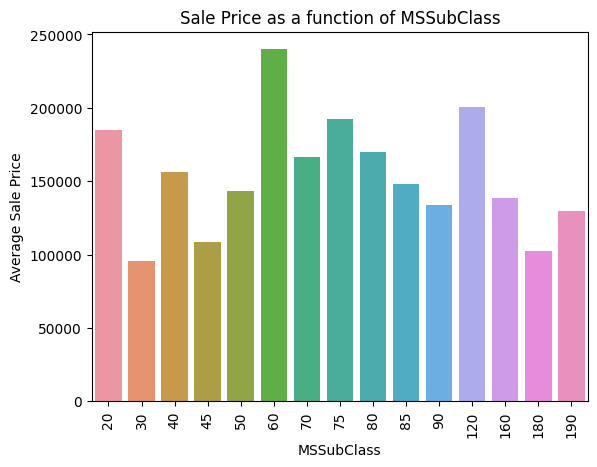

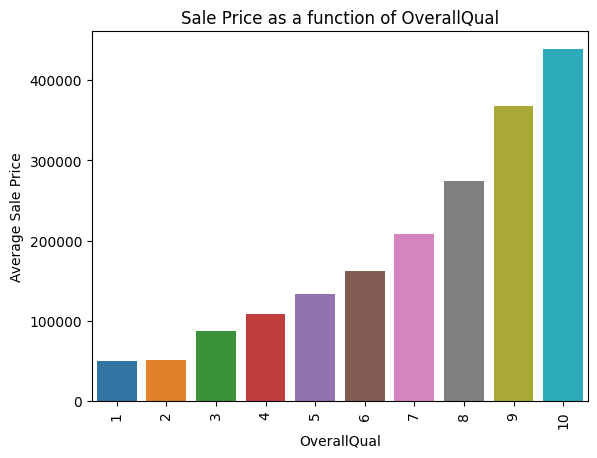

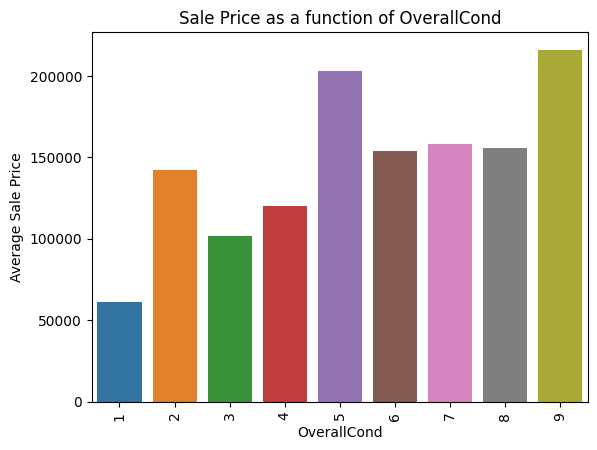

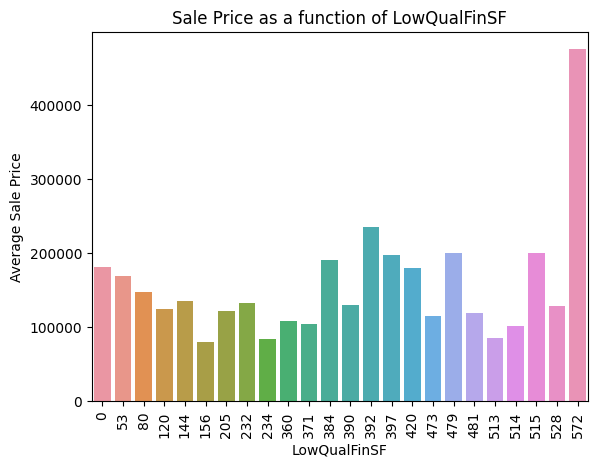

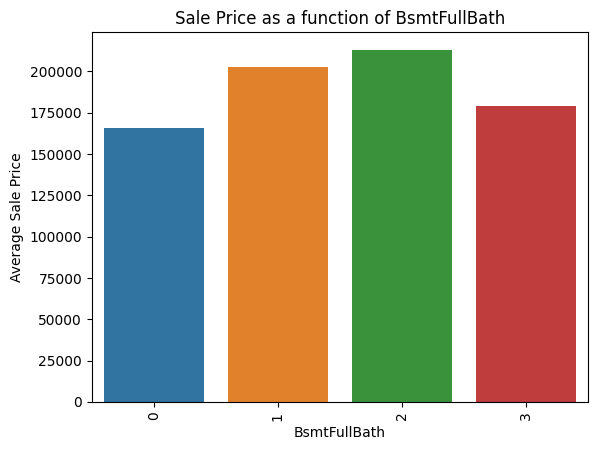

In [107]:
for feature in discrete_features[:5]:
    # take average sale price
    temp = full_data.groupby(feature)['SalePrice'].mean()

    sns.barplot(x = temp.index, y = temp)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Average Sale Price')
    plt.title(f'Sale Price as a function of {feature}')
    plt.show()

We can clearly see that these 5 discrete variables have at least *some* importance to the sale price. The clearest example is the overall quality, where an increase in quality parabolically increases the house value/price. 

In some other bar plots, we can see spikes in the bars, which shows that some specific values correlate with a higher housing price.

## Continuous Numerical Features
Similarly, we can find what continuous features we have.

In [108]:
continuous_features = [feature for feature in num_features if feature not in discrete_features + year_cols]
print(f'There are {len(continuous_features)} continuous features.')
df[continuous_features].head()

There are 15 continuous features.


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
Id,,,,,,,,,,,,,,,
1,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0
2,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0
3,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0
4,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0
5,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0


Like for discrete features, let's take a look at the first 5 continuous features and their distributions. 

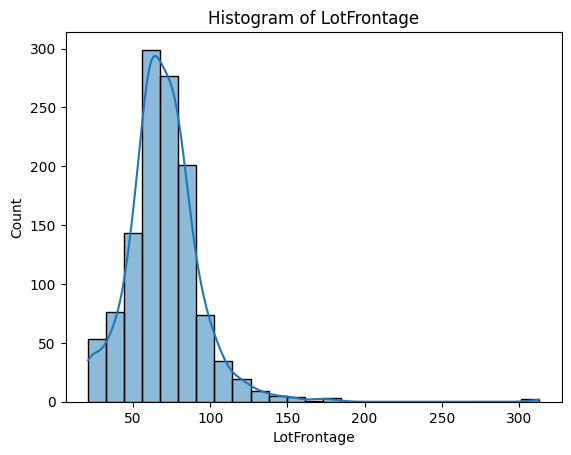

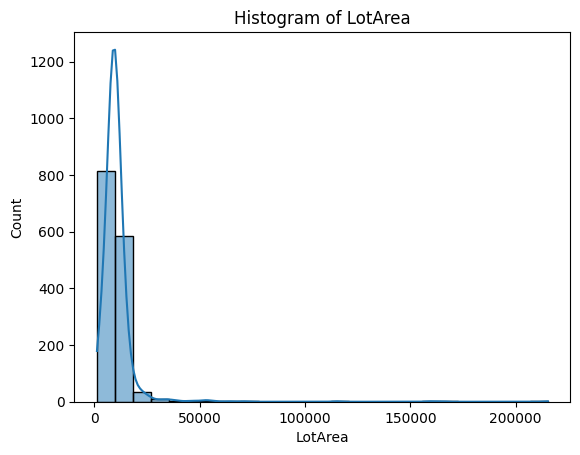

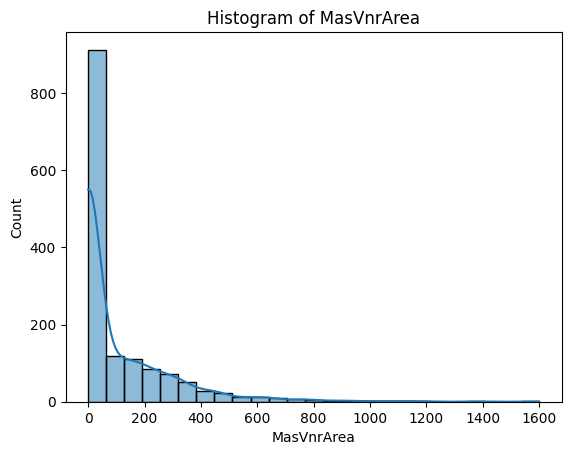

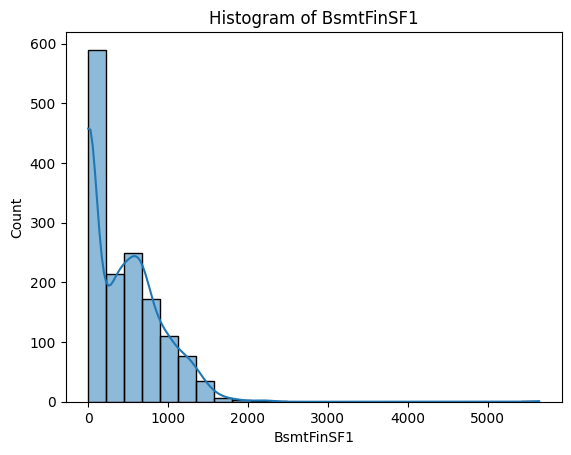

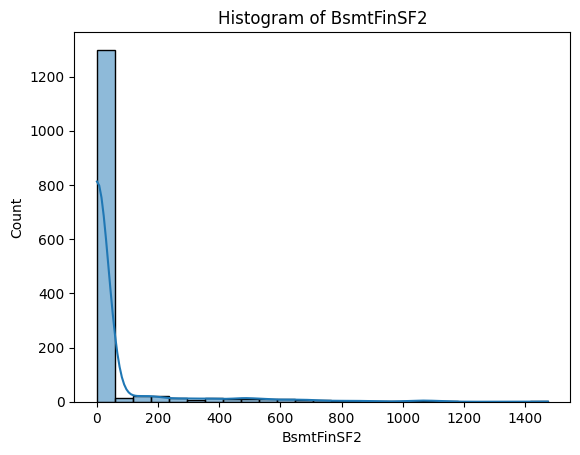

In [109]:
for feature in continuous_features[:5]:
    sns.histplot(df[feature], bins=25, kde=True)
    plt.xlabel(feature)
    plt.title(f'Histogram of {feature}')
    plt.show()

# Categorical Features
Now let's take a look at the categorical features

In [77]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'There is {len(cat_features)} categorical features.')
df[cat_features].head()

There is 38 categorical features.


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Let's take a look at how many unique values there is for each categorical feature.

In [79]:
for feature in cat_features:
    print(f'{feature}: {len(df[feature].unique())} unique values')

MSZoning: 5 unique values
Street: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 5 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 5 unique values
BsmtCond: 5 unique values
BsmtExposure: 5 unique values
BsmtFinType1: 7 unique values
BsmtFinType2: 7 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 6 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
GarageType: 7 unique values
GarageFinish: 4 unique values
GarageQual: 6 unique values
GarageCond: 6 unique values
PavedDrive: 3 unique values
S